## 타겟 데이터
- 와인의 종류 0, 1, 2의 세가지 값

## 특징 데이터

- 알콜(Alcohol)
- 말산(Malic acid)
- 회분(Ash)
- 회분의 알칼리도(Alcalinity of ash)
- 마그네슘(Magnesium)
- 총 폴리페놀(Total phenols)
- 플라보노이드 폴리페놀(Flavanoids)
- 비 플라보노이드 폴리페놀(Nonflavanoid phenols)
- 프로안토시아닌(Proanthocyanins)
- 색상의 강도(Color intensity)
- 색상(Hue)
- 희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)
- 프롤린(Proline)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, losses, optimizers, metrics, initializers, activations
from sklearn import datasets, model_selection
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
wine_data = datasets.load_wine()

In [2]:
target = wine_data['target']

In [3]:
data = wine_data['data']

In [4]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [5]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.2, random_state=42)

In [7]:
sc = preprocessing.StandardScaler()
sc.fit(x_train)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [8]:
print(x_train.shape)
print(x_test.shape)

(142, 13)
(36, 13)


In [9]:
print(y_train.shape)
print(y_test.shape)

(142,)
(36,)


In [10]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [11]:
print(y_train.shape)
print(y_test.shape)

(142, 3)
(36, 3)


In [12]:

model = models.Sequential()
elu = activations.elu
softmax = activations.softmax

model.add(layers.Dense(input_dim=x_train.shape[1], units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.Activation(elu))

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation(elu))

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation(elu)) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation(elu)) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation(elu)) 

# model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.Activation('elu'))

# model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.4))

model.add(layers.Dense(units=3, activation=softmax)) # Apply softmax function on model's output

In [13]:
model.compile(optimizer=optimizers.Adam(0.01), 
              loss=losses.categorical_crossentropy, # See other available losses @ https://keras.io/losses/
              metrics=[metrics.Accuracy(), metrics.Recall(), metrics.Precision()]) # TF 2.X 에서 Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi

In [14]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
4/4 [==============================] - 1s 100ms/step - loss: 26.9097 - accuracy: 0.4543 - recall: 0.5221 - precision: 0.5268 - val_loss: 39.0969 - val_accuracy: 0.6667 - val_recall: 0.6207 - val_precision: 0.6207
Epoch 2/30
4/4 [==============================] - 0s 22ms/step - loss: 40.8028 - accuracy: 0.7729 - recall: 0.7434 - precision: 0.7434 - val_loss: 0.0000e+00 - val_accuracy: 0.9770 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 3/30
4/4 [==============================] - 0s 21ms/step - loss: 4.3804 - accuracy: 0.9115 - recall: 0.9558 - precision: 0.9558 - val_loss: 0.0000e+00 - val_accuracy: 0.9885 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 4/30
4/4 [==============================] - 0s 20ms/step - loss: 4.1207 - accuracy: 0.9440 - recall: 0.9646 - precision: 0.9646 - val_loss: 0.0000e+00 - val_accuracy: 0.9885 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 5/30
4/4 [==============================] - 0s 22ms/step - loss: 2.1572 - accuracy: 0.9646 - r

In [15]:
result = model.evaluate(x_test, y_test, batch_size=10, verbose=1)

4/4 [==============================] - 0s 3ms/step - loss: 24.3325 - accuracy: 0.9815 - recall: 0.9722 - precision: 0.9722


In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'precision', 'val_loss', 'val_accuracy', 'val_recall', 'val_precision'])

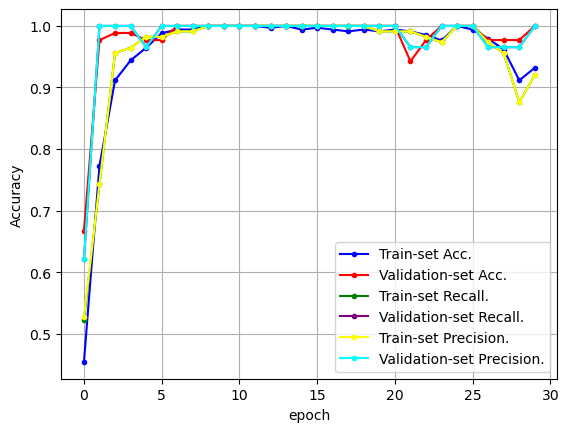

In [17]:
val_acc = history.history['val_accuracy']
acc = history.history['accuracy']

val_recall = history.history['val_recall']
recall = history.history['recall']

val_precision = history.history['val_precision']
precision = history.history['precision']

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

x_len = np.arange(len(recall))
plt.plot(x_len, recall, marker='.', c='green', label="Train-set Recall.")
plt.plot(x_len, val_recall, marker='.', c='purple', label="Validation-set Recall.")

x_len = np.arange(len(precision))
plt.plot(x_len, precision, marker='.', c='yellow', label="Train-set Precision.")
plt.plot(x_len, val_precision, marker='.', c='cyan', label="Validation-set Precision.")

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

In [18]:
model.predict(x_test)
np.argmax(model.predict(x_test), axis=1)

2/2 [==============================] - 0s 2ms/step


array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0], dtype=int64)

In [19]:
sample_data = np.array([[14.23, 1.71, 2.43, 15.6, 127.0, 2.80, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0]])
model.predict(sample_data)
np.argmax(model.predict(sample_data), axis=1)

1/1 [==============================] - 0s 19ms/step


array([0], dtype=int64)